Handwritten Digit Recognition Using Machine Learning

The goal of this project is to create a binary-class or multi-class image classification system that can reliably identify handwritten numbers from image data. Datasets like MNIST will be used as a benchmark for performance evaluation as the system is trained to recognise digits from input images using machine learning techniques, such as deep learning models (e.g., Convolutional Neural Networks) or traditional classifiers (e.g., SVM, KNN). The objective is to create a strong model that performs well in digit classification tasks by generalising to unseen digit samples.

✅ Step 1: Environment Setup and Imports

In [1]:
# Install TensorFlow if not already installed
!pip install tensorflow matplotlib --quiet

# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


✅ Step 2: Load and Visualize the MNIST Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


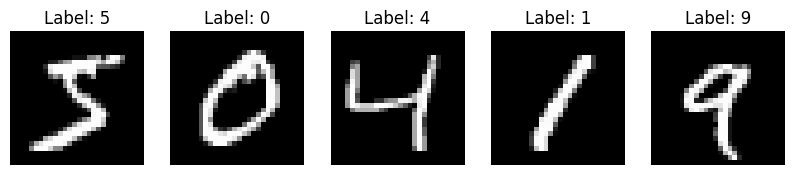

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print shapes of the datasets
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Visualize the first 5 training images
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


✅ Step 3: Preprocess the Data

Prior to entering the data into a neural network, we must:

Scale the pixel values from 0–255 to 0–1 to normalise the images.

Since CNNs require 3D input (height, width, and channels), reshape the data to include a channel dimension.

For multi-class classification, convert labels to categorical (one-hot encoding).

In [3]:
# Normalize the pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add a channel dimension (28, 28) → (28, 28, 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert class vectors to one-hot encoded labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Confirm new shapes
print("x_train shape:", x_train.shape)
print("y_train_cat shape:", y_train_cat.shape)


x_train shape: (60000, 28, 28, 1)
y_train_cat shape: (60000, 10)


✅ Step 4: Build the CNN Model

In [4]:
# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0–9)
])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

✅ Step 5: Compile the Model

Now we’ll configure the training process by specifying:

Loss function: categorical_crossentropy (for multi-class classification)

Optimizer: adam (adaptive learning rate)

Metrics: accuracy

In [5]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


✅ Step 6: Train the Model

We’ll now train the model using the training data for a few epochs. We’ll also validate on the test set to track accuracy.

In [6]:
# Train the model
history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test_cat)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.9078 - loss: 0.3020 - val_accuracy: 0.9856 - val_loss: 0.0454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9857 - val_loss: 0.0469
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9905 - loss: 0.0304 - val_accuracy: 0.9898 - val_loss: 0.0311
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9902 - val_loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9846 - val_loss: 0.0584


✅ Step 7: Evaluate the Model on the Test Set

In [7]:
# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.9846
Test loss: 0.0584


✅ Step 8: Visualize Training & Validation Performance

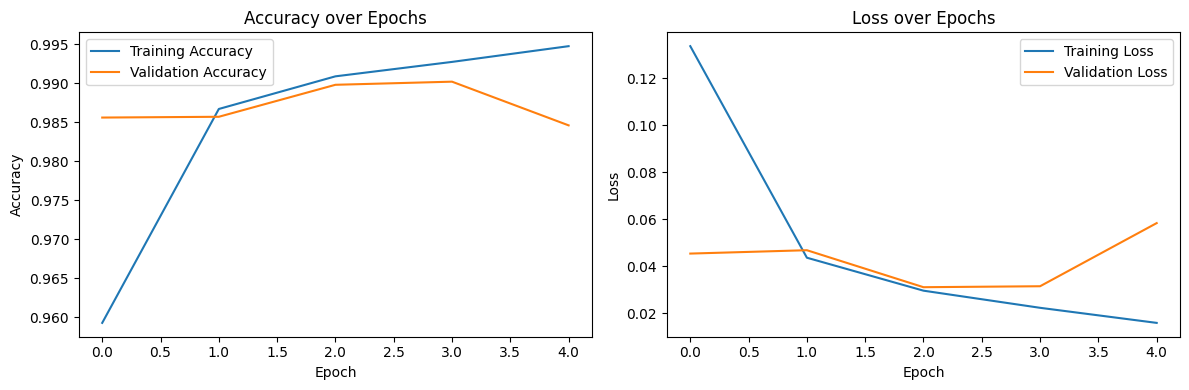

In [8]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


✅ Step 9: Make Predictions on Test Data

Predict class probabilities and convert them to class labels:

In [10]:
# Predict class probabilities for test images
y_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = y_prob.argmax(axis=1)

# True labels
y_true = y_test


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


✅ Step 10: Evaluate Predictions

🔹 Classification Report

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.97      1.00      0.99      1032
           3       1.00      0.91      0.95      1010
           4       0.99      1.00      0.99       982
           5       0.92      1.00      0.96       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



🔹 Confusion Matrix

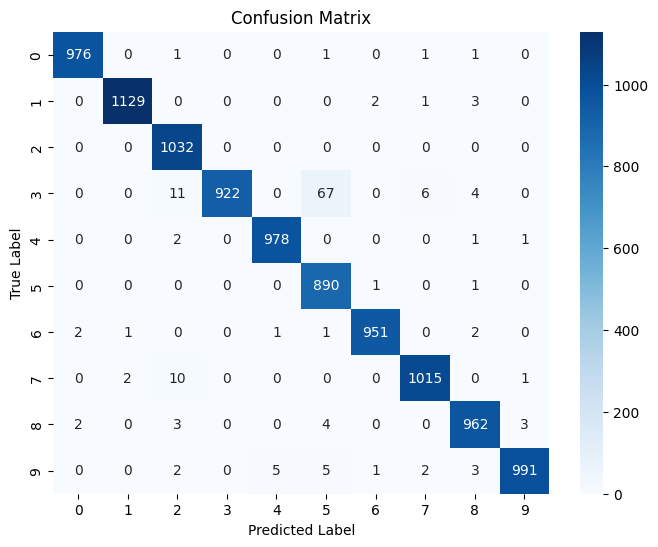

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


✅ Step 11: Visualize Sample Predictions

Pick a few images and visualize predicted vs actual labels:

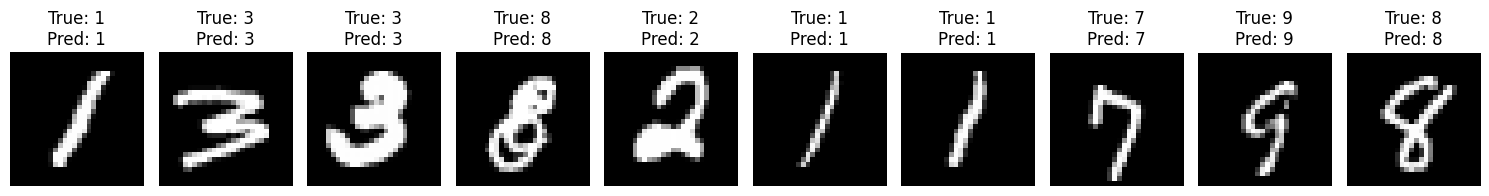

In [13]:
import numpy as np

# Show 10 random predictions
plt.figure(figsize=(15, 4))
for i in range(10):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
